## Pandas Practice

In [1]:
import numpy as np
import pandas as pd
from pydataset import data

#### pandas Series
- a Series is essentially a single column with an index
- if data is of mixed types, pandas will force it into a single type
- can generate a series from:
    1. a list
    2. a numpy array
    3. a dictionary
    4. a pandas DataFrame

#### Creating a Series from a list

In [2]:
my_list = [2, 3, 5]
type(my_list)

list

In [3]:
# a python list has an index, but it is a set of fixed integers
my_list[0]

2

In [4]:
# a Series index can be a name, datetime, etc

In [5]:
# convert my_list to a Series
my_series = pd.Series(my_list)
type(my_series)

pandas.core.series.Series

In [6]:
# what's inside a pandas Series?
my_series

0    2
1    3
2    5
dtype: int64

- Index: the left column is the Series index
- Values: the right column is the Series data or values
- Data type: the dtype here is a 64-bit integer

#### Creating a Series from a numpy array

In [7]:
my_array = np.array([8.0, 13.0, 21.0])
print(type(my_array), my_array)

<class 'numpy.ndarray'> [ 8. 13. 21.]


In [8]:
# convert to a Series
my_series = pd.Series(my_array)
type(my_series)

pandas.core.series.Series

In [9]:
my_series

0     8.0
1    13.0
2    21.0
dtype: float64

#### Creating a Series from a Dictionary

In [10]:
labeled_series = pd.Series({'a': 0, 'b': 1.5, 'c': 2, 'd': 3.5, 'e': 4, 'f': 5.5})

In [11]:
labeled_series

a    0.0
b    1.5
c    2.0
d    3.5
e    4.0
f    5.5
dtype: float64

#### Creating a Series from a DataFrame
- data from pydataset imports various datasets, here, sleepstudy data

In [12]:
sleep_df = data('sleepstudy')
sleep_df.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [13]:
# two sytax options to choose a column from this DataFrame:
# 1) df.columnname  2) df['columnname']
# DataFrame's index is retained for the Series
reaction_series = sleep_df.Reaction
type(reaction_series)

pandas.core.series.Series

In [14]:
days_series = sleep_df['Days']
type(days_series)

pandas.core.series.Series

In [15]:
# note that I could've created a single column DataFrame instead by using [[]]
df_that_resembles_a_series = sleep_df[['Days']]
type(df_that_resembles_a_series)

pandas.core.frame.DataFrame

In [16]:
# note that the printed output is formatted differently than a Series
df_that_resembles_a_series

,Days
1,0
2,1
3,2
4,3
5,4
...,...
176,5
177,6
178,7
179,8


In [17]:
days_series

1      0
2      1
3      2
4      3
5      4
      ..
176    5
177    6
178    7
179    8
180    9
Name: Days, Length: 180, dtype: int64

#### Data types for Series or DataFrames:
- `int` integers
- `float` floating point decimal numbers
- `bool` booleans -- True or False values
- `object` the category for Python strings
- `category` a fixed set of string values
- a name. an optional human-friendly name for the series
- inferring
- using `astype()`

#### Inferring
- pandas will infer the datatype when it can, e.g.

In [18]:
# here it recognizes that I fed it a list of Booleans
pd.Series([True, False, True])

0     True
1    False
2     True
dtype: bool

In [19]:
# here it inputs a list of strings as object type
pd.Series(['I', 'love', 'lamp'])

0       I
1    love
2    lamp
dtype: object

In [20]:
# here it sees a mixed type list and chooses object type since a series
# must have a single datatype
my_series = pd.Series([1, 3, 'five'])
my_series

0       1
1       3
2    five
dtype: object

In [21]:
# filter out 'five' from the Series and reassign
my_new_series = my_series[my_series != 'five']
my_new_series

0    1
1    3
dtype: object

In [22]:
# now that we have only integers in the Series, we can cast to an 
# int datatype using the .astype() method:
my_new_series.astype('int')

0    1
1    3
dtype: int64

In [23]:
# when we try this on the original Series it doesn't work
# my_series.astype('int')
# uncomment to see error message

In [24]:
# The Subject column in sleep study is actually an object representing a subject
# makes sense to cast it as an 'object' (however, the argument for this is 'str')
sleep_subj_series = sleep_df['Subject'].astype('str')
sleep_subj_series

1      308
2      308
3      308
4      308
5      308
      ... 
176    372
177    372
178    372
179    372
180    372
Name: Subject, Length: 180, dtype: object

#### Vectorized Series Operations
- since a pandas Series is just a numpy array with an index bolted on, we can use arithmetic and comparison operator in the same way.

In [25]:
fibi_series = pd.Series([0, 1, 1, 2, 3, 5, 8])

fibi_series.head()

0    0
1    1
2    1
3    2
4    3
dtype: int64

In [26]:
fibi_series + 1

0    1
1    2
2    2
3    3
4    4
5    6
6    9
dtype: int64

In [27]:
fibi_series / 2

0    0.0
1    0.5
2    0.5
3    1.0
4    1.5
5    2.5
6    4.0
dtype: float64

In [28]:
# note you can see that the underlying Series values didn't change
fibi_series

0    0
1    1
2    1
3    2
4    3
5    5
6    8
dtype: int64

In [29]:
fibi_series >= 5

0    False
1    False
2    False
3    False
4    False
5     True
6     True
dtype: bool

In [30]:
(fibi_series >= 3) & (fibi_series % 2 == 0)

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

#### Series 'Attributes'
- attributes are a sort of metadata about pandas objects
- they are easily accessible using .notation withouth ()(unlike .methods())
- in Jupyter, can see a list of attributes by pressing `tab` after `seriesname.`
- `.index` allows us to reference the Series index
- `.values` allows us to reference the values of the Series
- `.dtype` allows us to reference the datatype of the Series
- `.size` returns an int of the number of rows. NULL vals ARE included.
- `.shape` returns a tuple representing rows, columns. NULL vals ARE included.

In [31]:
fibi_series.dtype

dtype('int64')

In [32]:
fibi_series.index

RangeIndex(start=0, stop=7, step=1)

In [33]:
# note that the values are literally a numpy array
fibi_series.values

array([0, 1, 1, 2, 3, 5, 8])

#### Series Methods
- methods used on pandas Series often return new Series objects
- most methods have default parameters to not overwrite original vals (inplace=True)

- `.head()` returns the 1st 5 rows of the series
- `.tail()` returns the last 5
- 5 is the default, can adjust with an int in the arguments i.e. `.head(10)`

In [34]:
fibi_series.head(), fibi_series.tail(2)

(0    0
 1    1
 2    1
 3    2
 4    3
 dtype: int64,
 5    5
 6    8
 dtype: int64)

- `.sample()` returns a random sample of rows in the Series
- n=1 by default, can put in any int
- can exceed number of rows with argument replace=True

In [35]:
fibi_series.sample(), fibi_series.sample(3), fibi_series.sample(20, replace=True)

(5    5
 dtype: int64,
 6    8
 2    1
 5    5
 dtype: int64,
 0    0
 2    1
 4    3
 5    5
 2    1
 1    1
 2    1
 5    5
 4    3
 0    0
 2    1
 1    1
 6    8
 3    2
 4    3
 1    1
 1    1
 2    1
 5    5
 3    2
 dtype: int64)

- `.value_counts()` counts number of records/items/rows containing each unique value (think 'group by' from MySQL)

In [36]:
sleep_days_series = sleep_df.Days
sleep_days_series.value_counts()

0    18
1    18
2    18
3    18
4    18
5    18
6    18
7    18
8    18
9    18
Name: Days, dtype: int64

- In MySQL this would look like:

  SELECT Days, COUNT(Subject)<br>    FROM my_df<br>    GROUP BY Days;

#### Descriptive Stats in pandas
- pandas has a number of methods that can be used to view summary stats about our data. Below are some of the most common:
|  Function	 |   Description   |
|:------------|:--------------------------------|
|count|	Number of non-NA observations|
|sum|	Sum of values|
|mean|	Mean of values|
|median|	Arithmetic median of values|
|min|	Minimum|
|max|	Maximum|
|mode|	Mode|
|abs|	Absolute Value|
|std|	Bessel-corrected sample standard deviation|
|quantile|	Sample quantile (value at %)|

In [37]:
sleep_reaction_time = sleep_df.Reaction

In [38]:
{
    'count': sleep_reaction_time.count(),
    'sum': sleep_reaction_time.sum(),
    'mean': sleep_reaction_time.mean(),
    'median': sleep_reaction_time.median()
}

{'count': 180,
 'sum': 53731.42049999999,
 'mean': 298.50789166666664,
 'median': 288.6508}

- `.describe()` returns a series of descriptive stats on a Series (or DataFrame)
- what it returns depends on the dtype of the values

In [39]:
sleep_reaction_time.describe()

count    180.000000
mean     298.507892
std       56.328757
min      194.332200
25%      255.375825
50%      288.650800
75%      336.752075
max      466.353500
Name: Reaction, dtype: float64

In [40]:
print(fibi_series)
fibi_series.describe()

0    0
1    1
2    1
3    2
4    3
5    5
6    8
dtype: int64


count    7.000000
mean     2.857143
std      2.794553
min      0.000000
25%      1.000000
50%      2.000000
75%      4.000000
max      8.000000
dtype: float64

- `.nlargest()` returns n largest values in a Series
- `.nsmallest()` returns n smallest values in a Series
- defaults to 5, but can add `n=an_integer`
- for duplicates, can add argument `keep='first', 'last', or 'all'`

In [41]:
fibi_series.nlargest(n=3, keep='first')

6    8
5    5
4    3
dtype: int64

In [42]:
fibi_series.nsmallest(n=2, keep='all')

0    0
1    1
2    1
dtype: int64

- `.sort_values()` sorts values defaulting to ascending=True
- `.sort_index()` sorts index defaulting to ascending=True

In [43]:
sleep_reaction_time.sort_index(ascending=False)

180    364.1236
179    369.1417
178    343.2199
177    334.4818
176    329.6076
         ...   
5      356.8519
4      321.4398
3      250.8006
2      258.7047
1      249.5600
Name: Reaction, Length: 180, dtype: float64

#### [Pandas Series Exercises](https://ds.codeup.com/python/series/)

In [44]:
# make a pandas Series from a list of fruits
fruits = pd.Series(["kiwi", "mango", "strawberry", "pineapple", "gala apple", "honeycrisp apple", "tomato", "watermelon", "honeydew", "kiwi", "kiwi", "kiwi", "mango", "blueberry", "blackberry", "gooseberry", "papaya"]
)

1. Determine the number of elements in fruits.

In [45]:
len(fruits)

17

In [46]:
fruits.size

17

In [47]:
fruits.index, fruits.values, fruits.shape

(RangeIndex(start=0, stop=17, step=1),
 array(['kiwi', 'mango', 'strawberry', 'pineapple', 'gala apple',
        'honeycrisp apple', 'tomato', 'watermelon', 'honeydew', 'kiwi',
        'kiwi', 'kiwi', 'mango', 'blueberry', 'blackberry', 'gooseberry',
        'papaya'], dtype=object),
 (17,))

In [48]:
fruits.describe

<bound method NDFrame.describe of 0                 kiwi
1                mango
2           strawberry
3            pineapple
4           gala apple
5     honeycrisp apple
6               tomato
7           watermelon
8             honeydew
9                 kiwi
10                kiwi
11                kiwi
12               mango
13           blueberry
14          blackberry
15          gooseberry
16              papaya
dtype: object>

In [49]:
fruits.head(), fruits.tail(3), fruits.sample(2)

(0          kiwi
 1         mango
 2    strawberry
 3     pineapple
 4    gala apple
 dtype: object,
 14    blackberry
 15    gooseberry
 16        papaya
 dtype: object,
 5     honeycrisp apple
 16              papaya
 dtype: object)

In [50]:
fruits.unique()

array(['kiwi', 'mango', 'strawberry', 'pineapple', 'gala apple',
       'honeycrisp apple', 'tomato', 'watermelon', 'honeydew',
       'blueberry', 'blackberry', 'gooseberry', 'papaya'], dtype=object)

In [51]:
fruits.unique().shape

(13,)

In [52]:
fruits.value_counts()

kiwi                4
mango               2
strawberry          1
pineapple           1
gala apple          1
honeycrisp apple    1
tomato              1
watermelon          1
honeydew            1
blueberry           1
blackberry          1
gooseberry          1
papaya              1
dtype: int64

In [53]:
# return the name of the fruit that occurs the most times
fruits.value_counts().head(1).index[0]

'kiwi'

In [54]:
# return the name of the fruit that occurs the least times
fruits.value_counts().nsmallest(keep='all').index.tolist()

['strawberry',
 'pineapple',
 'gala apple',
 'honeycrisp apple',
 'tomato',
 'watermelon',
 'honeydew',
 'blueberry',
 'blackberry',
 'gooseberry',
 'papaya']

### Series Part II
- Indexing and subseting
- The .str attribute
- Methods: `.any()` `.all` `.isin` `.apply`

#### Subsetting and Indexing:
- We can select subsets of our data using index labels, index position, or boolean sequences (list, array, Series).
- We can also pass a sequence of boolean values to the indexing operator, []; that sequence could be a list or array, but it can also be another pandas Series **if the index of the boolean Series matches the original Series.**


In [55]:
pi_series = pd.Series([3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5])
booleans = pi_series > 5
booleans

0     False
1     False
2     False
3     False
4     False
5      True
6     False
7      True
8     False
9     False
10    False
dtype: bool

In [56]:
pi_series[booleans]

5    9
7    6
dtype: int64

- I can pass my conditional expression into the indexing operator too.

In [57]:
pi_series[pi_series > 5]

5    9
7    6
dtype: int64

- to create compound logical statements to narrow/expand our subset
- wrap parens around each comparison, then use `|` for OR, and `&` for AND

In [58]:
# Find the numbers that are even or greater than 5:
pi_series[(pi_series % 2 == 0) | (pi_series > 5)]

2    4
5    9
6    2
7    6
dtype: int64

Let's use subsetting to find all response times that are in the 4th quartile of response times.

1. identify the value at the 75th percentile using describe and subsetting using the row name '75%'.
1. subset the series using that value in a conditional statement (where 'values' > 'q3')

In [59]:
# change this from seconds to minutes for interpretability
sleep_reaction_minutes = sleep_reaction_time / 60
sleep_reaction_minutes.describe()

count    180.000000
mean       4.975132
std        0.938813
min        3.238870
25%        4.256264
50%        4.810847
75%        5.612535
max        7.772558
Name: Reaction, dtype: float64

In [60]:
# .describe produces a series so we can use the index to call values
type(sleep_reaction_minutes.describe())

pandas.core.series.Series

In [63]:
q3 = sleep_reaction_minutes.describe()['75%']

In [65]:
sleep_reaction_minutes[sleep_reaction_minutes > q3].head()

5     5.947532
6     6.911502
7     6.370063
9     7.176422
10    7.772558
Name: Reaction, dtype: float64

#### The .str attribute
- In addition to vectorized arithmetic operations, pandas also provides us with a way to vectorize string manipulation.
- Once we access the .str attribute, we can apply string methods to string values in a Series
- This kind of string manipulation does NOT mutate the underlying Series.
- One must assign the manipulation to a variable to keep it.

In [66]:
# use the .lower method to convert each string value to lowercase
ds_team_series = pd.Series(['Adam', 'Adam', 'Andrew', 'Carina', 'John', 'John', 
                            'Madeleine', 'Misty', 'Margaret', 'Ryan', 'Tasha'
                           ])
ds_team_series.str.lower()

0          adam
1          adam
2        andrew
3        carina
4          john
5          john
6     madeleine
7         misty
8      margaret
9          ryan
10        tasha
dtype: object

In [67]:
ds_team_series = ds_team_series.str.replace('rgaret', 'ggie')

In [68]:
ds_team_series

0          Adam
1          Adam
2        Andrew
3        Carina
4          John
5          John
6     Madeleine
7         Misty
8        Maggie
9          Ryan
10        Tasha
dtype: object

In [69]:
string_series = pd.Series(['Hello', 'CodeuP', 'StUDenTs'])
string_series

0       Hello
1      CodeuP
2    StUDenTs
dtype: object

In [70]:
string_series.str.lower()

0       hello
1      codeup
2    students
dtype: object

In [71]:
string_series.str.replace('e', '_')

0       H_llo
1      Cod_uP
2    StUD_nTs
dtype: object

#### Method Chaining
- Since each method returns a Series, they can be chained together like this:

In [72]:
string_series.str.lower().str.replace('e', '_')

0       h_llo
1      cod_up
2    stud_nts
dtype: object

- Can even use method chaining and indexing together:

In [73]:
string_series[string_series.str.lower().str.startswith('h')]

0    Hello
dtype: object

#### More Series Methods

`.any()`: returns a single boolean...do any values in the series meet the condition?

In [74]:
(fibi_series > 3).any()

True

`.all()`: returns a single boolean...do all values in the Series meet the condition?

In [75]:
(fibi_series > 3).all()

False

`.isin()`: comparing string of each item in Series to a list of strings. Is the string in your series found in the list of strings? Returns a Series of boolean values.

In [77]:
# Use .isin() to tell whether each value is in a set of known values.
vowels = list('aeiouy')
letters = list('abcdefghijkeliminnow')
letters_series = pd.Series(letters)
letters_series.isin(vowels).value_counts()

False    13
True      7
dtype: int64

In [78]:
letters

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'e',
 'l',
 'i',
 'm',
 'i',
 'n',
 'n',
 'o',
 'w']

In [81]:
# filter our list of letters to only vowels by subsetting w/ a conditional
letters_series[letters_series.isin(vowels)]

0     a
4     e
8     i
11    e
13    i
15    i
18    o
dtype: object

`.apply`: apply a function to each item in a Series
- define the function -> series.apply(fcn)
- using a lambda: series.apply(lambda n:)

In [83]:
# Create a function that we will later pass with .apply()

def even_or_odd(n):
    '''
    This function takes in a number and returns a string indicating
    whether the passed number is even or odd.
    '''
    if n % 2 == 0:
        return 'even'
    else:
        return 'odd'

In [84]:
fibi_series.apply(even_or_odd)

0    even
1     odd
2     odd
3    even
4     odd
5     odd
6    even
dtype: object

In [87]:
# using a lambda function:
fibi_series.apply(lambda x: 'even' if x % 2 == 0 else 'odd')

0    even
1     odd
2     odd
3    even
4     odd
5     odd
6    even
dtype: object

### Exercises Part II

In [88]:
fruits.str.upper()

0                 KIWI
1                MANGO
2           STRAWBERRY
3            PINEAPPLE
4           GALA APPLE
5     HONEYCRISP APPLE
6               TOMATO
7           WATERMELON
8             HONEYDEW
9                 KIWI
10                KIWI
11                KIWI
12               MANGO
13           BLUEBERRY
14          BLACKBERRY
15          GOOSEBERRY
16              PAPAYA
dtype: object

In [105]:
# count the number of 'a' in each string using string vectorization
fruits.str.lower().str.count('a')

0     0
1     1
2     1
3     1
4     3
5     1
6     1
7     1
8     0
9     0
10    0
11    0
12    1
13    0
14    1
15    0
16    3
dtype: int64

In [110]:
# Output the number of vowels in each and every string value
# Using count here with a regular expression
fruits.str.count('[aeiouAEIOU]')

0     2
1     2
2     2
3     4
4     4
5     5
6     3
7     4
8     3
9     2
10    2
11    2
12    2
13    3
14    2
15    4
16    3
dtype: int64

In [114]:
# count the number of letters in every fruit
fruits.str.count('[\w]')

0      4
1      5
2     10
3      9
4      9
5     15
6      6
7     10
8      8
9      4
10     4
11     4
12     5
13     9
14    10
15    10
16     6
dtype: int64

In [121]:
# write the code to get the longest string value
fruits[fruits.str.count('[\w]') == (fruits.str.count('[\w]').max())]

5    honeycrisp apple
dtype: object

In [144]:
# which strings have two or more 'o's?
fruits[fruits.str.count('[o]') >= 2]

6         tomato
15    gooseberry
dtype: object

In [143]:
# which strings contain 'berry'?
fruits[fruits.str.contains('berry')]

2     strawberry
13     blueberry
14    blackberry
15    gooseberry
dtype: object

In [142]:
# which strings contain 'apple'?
fruits[fruits.str.contains('apple')]

3           pineapple
4          gala apple
5    honeycrisp apple
dtype: object

In [141]:
# which string contains the most vowels?
fruits[fruits.str.count('[aeiouaeiou]') == fruits.str.count('[aeiouAEIOU]').max()]

5    honeycrisp apple
dtype: object

In [145]:
# make sure this catches duplicate maxes
fruits_e = fruits.str.replace('pineapple', 'pineapplee')

In [146]:
fruits_e[fruits_e.str.count('[aeiouAEIOU]') == fruits_e.str.count('[aeiouAEIOU]').max()]

3          pineapplee
5    honeycrisp apple
dtype: object

## Series Part II
- Binning
- Plotting

#### Numerical to Categorical Values - Binning & Cutting
- `pd.cut(series, bins=n)` will put numerical values into discrete bins.
- this is useful when we want to turn continuous values into categorical values
- pandas will default to n bins of equal size.
- We can specify the bin edges ourselves by passing a list of bin edges

In [148]:
# Create bins of equal intervals
reaction_bins_series = pd.cut(sleep_reaction_minutes, 4)

In [151]:
# look at the bins and number of values per bin
# bottom edge of the bin is exclusive )(
# top edge of the bin is inclusive ][
# can pass the argument right=False to reverse this
# The behavior can be altered by the include_lowest parameter, which, if set to
# True, will make the left endpoint inclusive as well.
reaction_bins_series.value_counts()

(4.372, 5.506]    75
(3.234, 4.372]    53
(5.506, 6.639]    44
(6.639, 7.773]     8
Name: Reaction, dtype: int64

In [156]:
# set the bins manually
# note that I made the left value inclusive and right exclusive
reaction_bins_series = pd.cut(sleep_reaction_minutes, [3, 4, 5, 6, 7, 8], right=False)

In [157]:
reaction_bins_series.value_counts()

[4, 5)    74
[5, 6)    51
[3, 4)    28
[6, 7)    22
[7, 8)     5
Name: Reaction, dtype: int64

- The `value_counts()` method can also cut values using bins.
- Use the `bins=n` argument like this:

In [158]:
sleep_reaction_minutes.value_counts(bins=5)

(4.146, 5.052]    70
(5.052, 5.959]    48
(3.233, 4.146]    35
(5.959, 6.866]    20
(6.866, 7.773]     7
Name: Reaction, dtype: int64

In [160]:
# vs. without the bins where it's not very useful
sleep_reaction_minutes.value_counts()

4.159333    1
4.258785    1
5.495412    1
6.324075    1
6.048640    1
           ..
4.825917    1
4.612822    1
4.996828    1
4.952850    1
6.068727    1
Name: Reaction, Length: 180, dtype: int64

#### Plotting
- The `.plot()` pandas method allows us to quickly visualize the data in a Series. It's built on top of Matplotlib.
- By default, Matplotlib will choose the best type of plot for us.
- We can also customize our plot using the parameters of the .plot method or by using Matplotlib.

<AxesSubplot:>

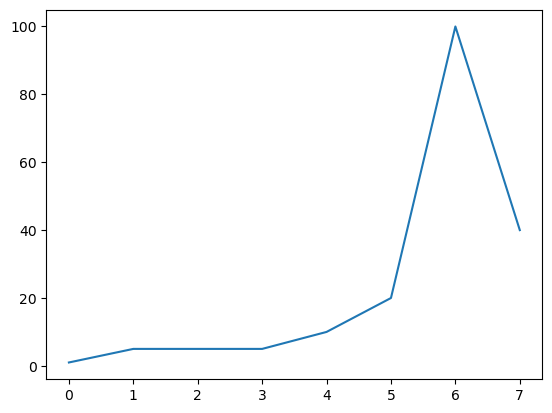

In [161]:
# Matplotlib is choosing the plot type for us here:

nums_series = pd.Series([1, 5, 5, 5, 10, 20, 100, 40])
nums_series.plot()

<AxesSubplot:ylabel='Frequency'>

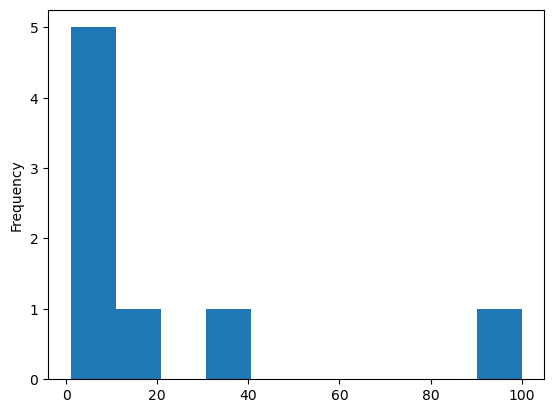

In [162]:
# here we specify the plot type we want matplotlib to use:
nums_series.plot.hist()

[Text(0.5, 0, 'Letter'), Text(0, 0.5, 'Frequency')]

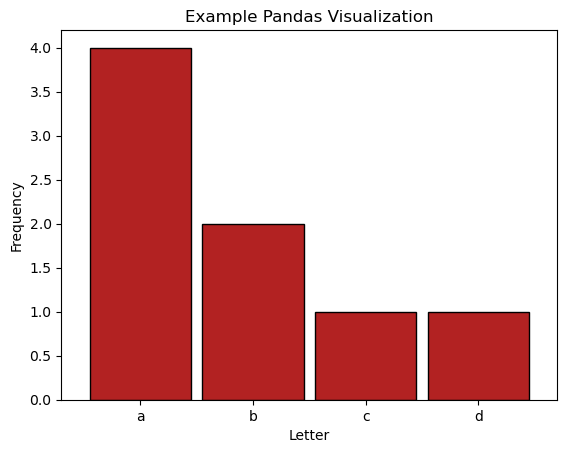

In [163]:
# Use the parameters of the .plot method to customize my chart.

(
    pd.Series(['a', 'b', 'a', 'c', 'b', 'a', 'd', 'a']).
    value_counts().plot.bar(title='Example Pandas Visualization',
                           rot=0,
                           color='firebrick',
                           ec='black',
                           width=.9).set(xlabel='Letter',
                                        ylabel='Frequency')
)

## Exercises Part III

[Exercises here](https://ds.codeup.com/python/series/)